<a href="https://colab.research.google.com/github/YuriosChe/algorithms-templates/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%C2%ABPython_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

* Требуется выполнить следующее задание:
# Задание Баллы
* 1 Загрузите файл HR.csv в pandas dataframe 5
* 2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10
* 3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10
* 4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
* 5 Показать распределение сотрудников по зарплатам. 5
* 6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
* 7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
* 8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
* 9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20
* 10 Загрузить jupyter notebook с решение на github и прислать ссылку 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/HR.csv')

In [3]:
df



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Посмотрим данные сгрупировав их по left и по остальным данным

In [6]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [7]:
df.groupby('left').mean()

<ipython-input-7-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

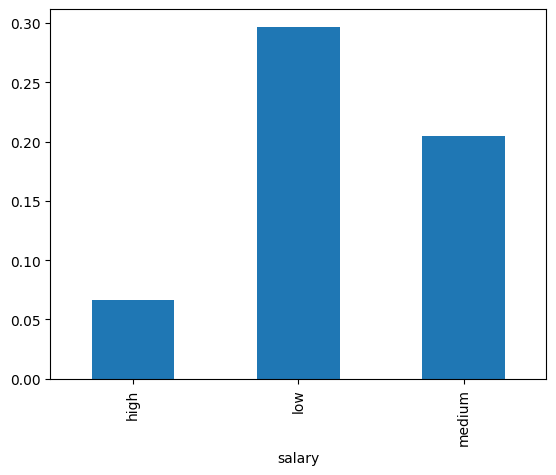

In [ ]:
df.groupby('salary')['left'].mean().plot(kind = 'bar')

<Axes: xlabel='salary'>

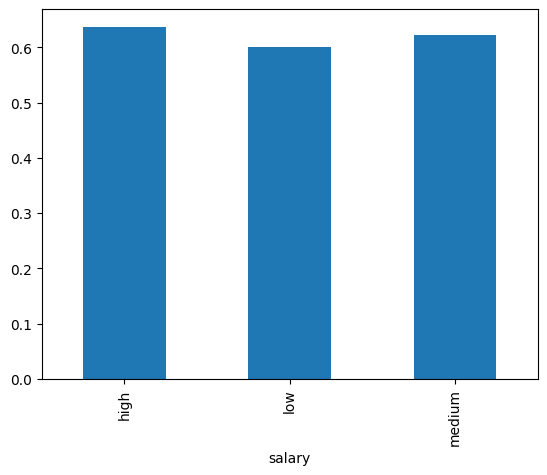

In [8]:
df.groupby('salary')['satisfaction_level'].mean().plot(kind = 'bar')

* 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. 10

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-10-a3867805157b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

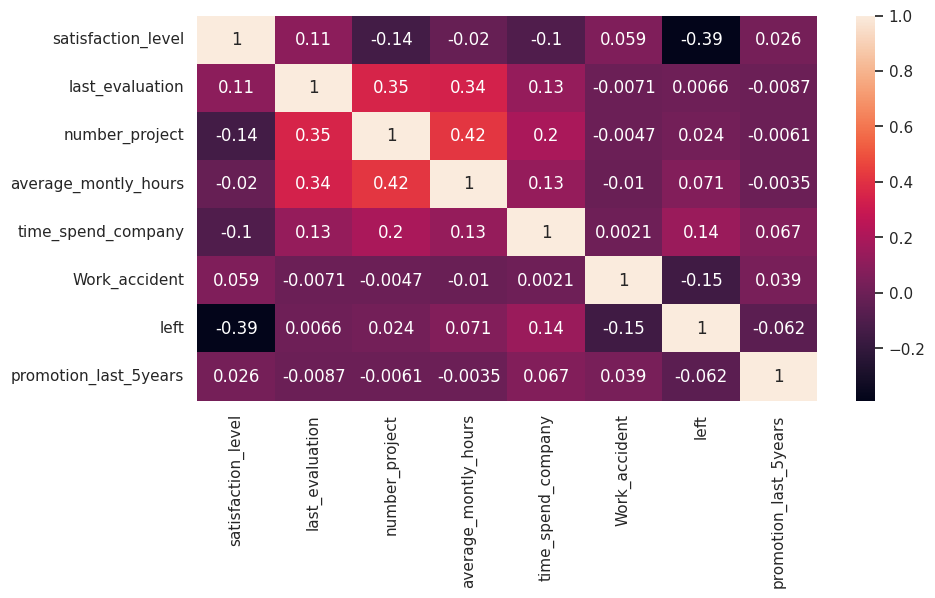

In [10]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(df.corr(), annot=True)

In [11]:
df.corr().min().sort_values(ascending = False)

<ipython-input-11-e76efccdc5d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().min().sort_values(ascending = False)


last_evaluation         -0.008684
average_montly_hours    -0.020048
promotion_last_5years   -0.061788
time_spend_company      -0.100866
number_project          -0.142970
Work_accident           -0.154622
satisfaction_level      -0.388375
left                    -0.388375
dtype: float64

Проанализировав данные можем сказать что самые две скорелируемые переменные - количесвто проектов и проведенное среднее время за работой. Минимальное Уволнение и удовлетворенность работы.

**Пошли дальше**

* 4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
* 5 Показать распределение сотрудников по зарплатам. 5
* 6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
* 7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
* 8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
* 9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20
* 10 Загрузить jupyter notebook с решение на github и прислать ссылку 5

In [ ]:
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: >

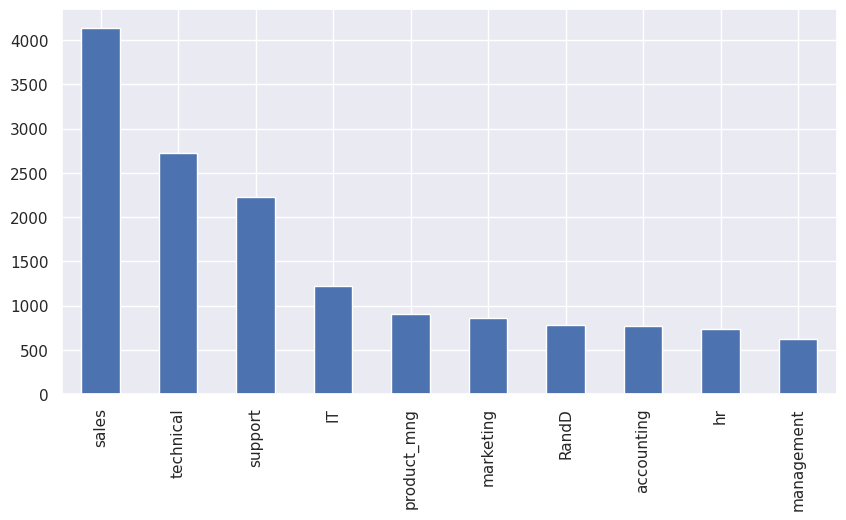

In [12]:
df['department'].value_counts().plot(kind = 'bar')

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: >

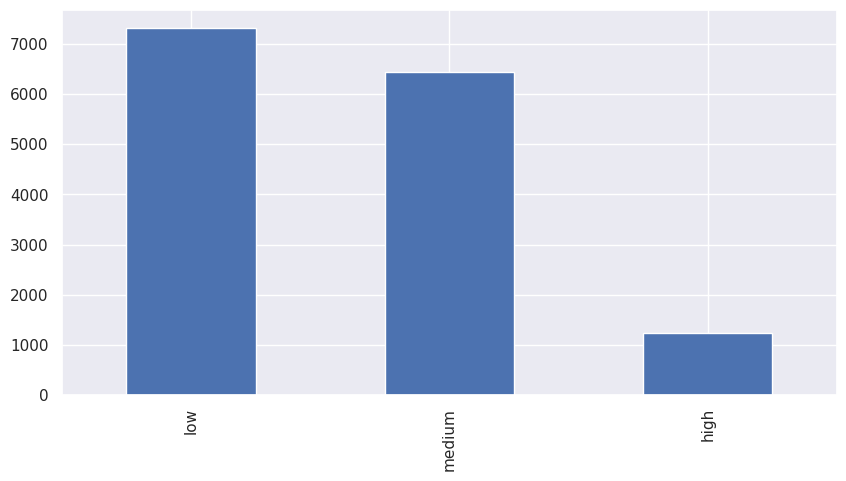

In [13]:
df['salary'].value_counts().plot(kind = 'bar')

* 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 5

In [ ]:
df.groupby('salary')['department'].value_counts()

salary  department 
high    sales           269
        management      225
        technical       201
        support         141
        IT               83
        marketing        80
        accounting       74
        product_mng      68
        RandD            51
        hr               45
low     sales          2099
        technical      1372
        support        1146
        IT              609
        product_mng     451
        marketing       402
        RandD           364
        accounting      358
        hr              335
        management      180
medium  sales          1772
        technical      1147
        support         942
        IT              535
        product_mng     383
        marketing       376
        RandD           372
        hr              359
        accounting      335
        management      225
Name: department, dtype: int64

<Axes: xlabel='salary,department'>

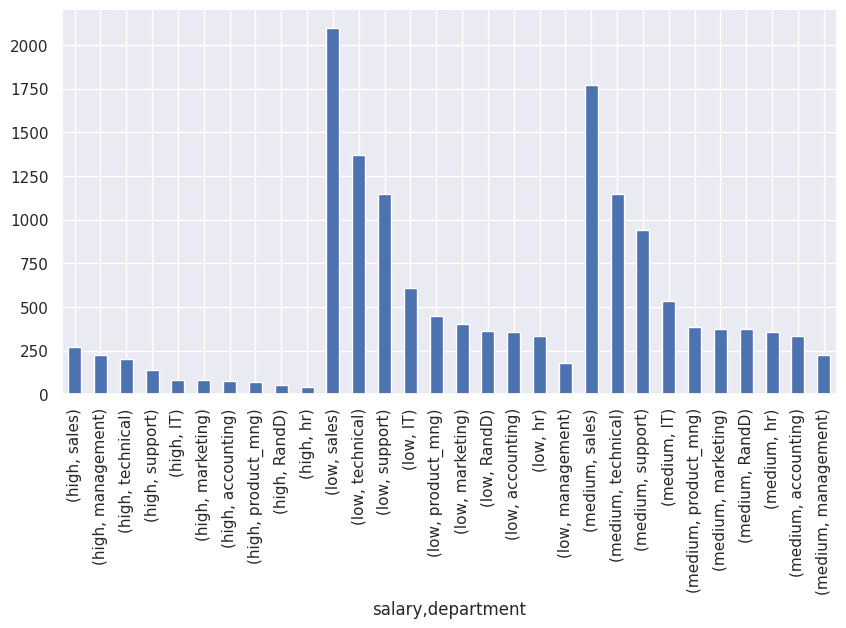

In [14]:
df.groupby('salary')['department'].value_counts().plot(kind = 'bar')

In [ ]:
df.groupby('department')['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

<Axes: xlabel='department,salary'>

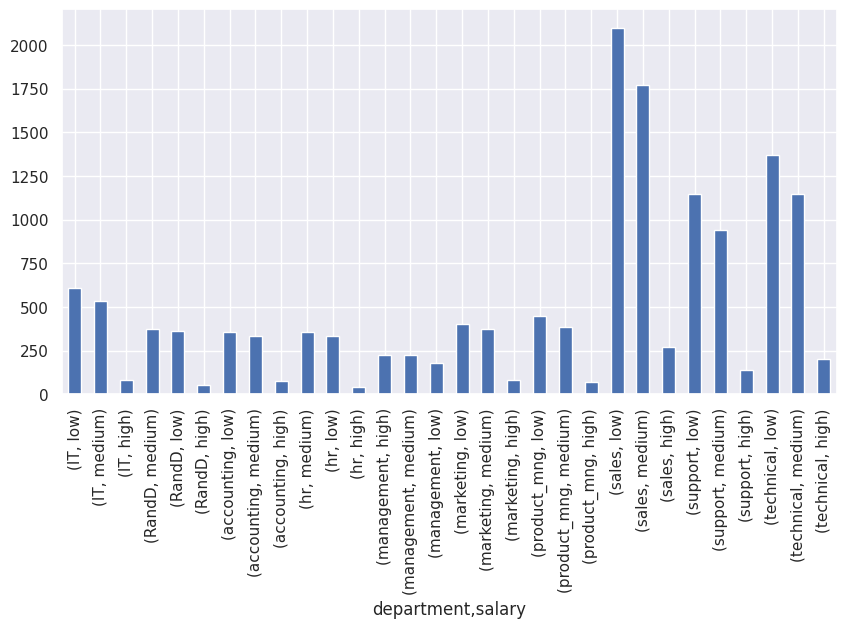

In [15]:
df.groupby('department')['salary'].value_counts().plot(kind = 'bar')

7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 10

Что бы проверить эти гипотезу подготовим данные

In [16]:
df_sa = df[['average_montly_hours', 'salary']]

In [17]:
df_sa

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low
...,...,...
14994,151,low
14995,160,low
14996,143,low
14997,280,low


In [18]:
df_sa.groupby('salary').mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


<Axes: xlabel='salary'>

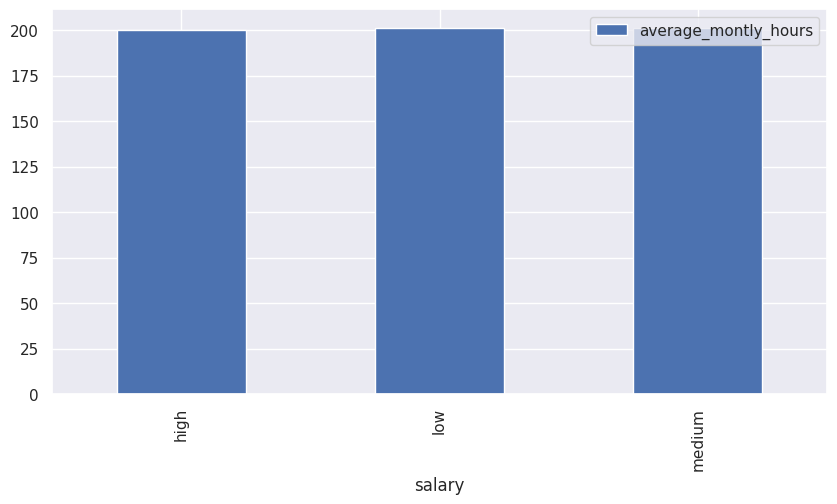

In [19]:
df_sa.groupby('salary').mean().plot(kind = 'bar')

Посмотрев на данные видим что сотрудники с большим окладом(в среднем) , проводят меньше времени чем соьтрудники с меньшим окладом(в средих величинах).Самое больше время проводят сотрудники со среднем окладом. И думаю что тут по цыфрав средних все видно какие то модели по проверки средних не имеют смысла все и так видно.как мне кажеться.

* 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
Доля сотрудников с повышением за последние 5 лет
Средняя степень удовлетворенности
Среднее количество проектов
* 9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки 20
* 10 Загрузить jupyter notebook с решение на github и прислать ссылку 5

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
df.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
Видим, что разница между уволевшимися и не уволившимися сотрудниками в продвижении заметная.

In [27]:
df.groupby('satisfaction_level').head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3617,0.23,0.64,5,150,5,0,0,0,hr,medium
3817,0.28,0.38,5,139,4,0,0,0,support,medium
3878,0.23,0.84,5,140,4,0,0,0,IT,low
4473,0.28,0.83,5,279,4,0,0,0,technical,medium


In [28]:
df_sn = df[['satisfaction_level', 'number_project']]

In [29]:
df_sn.corr()

,satisfaction_level,number_project
satisfaction_level,1.00000,-0.14297
number_project,-0.14297,1.00000


In [30]:
df.groupby('satisfaction_level')['number_project'].mean()

satisfaction_level
0.09    6.179487
0.10    6.209497
0.11    6.182090
0.12    4.300000
0.13    4.425926
          ...   
0.96    3.802956
0.97    3.846591
0.98    3.743169
0.99    3.866279
1.00    3.900901
Name: number_project, Length: 92, dtype: float64

Данные интересные, зависимсоти в количестве проектов и удовлетворенности не видно, плюс в среднем 3 -4 проекта по уровню удовлетворенности приобладает, если больше то удовлетворенность падает.

* 9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки 20

In [42]:
X = df[['left']]
y = df['satisfaction_level']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
X_train.shape

(10499, 1)

In [45]:
y_train.shape

(10499,)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([-0.23194643])

In [48]:
model.intercept_

0.6690012500000001

In [49]:
y_pred = model.predict(X_test)
y_pred

array([0.66900125, 0.66900125, 0.66900125, ..., 0.66900125, 0.66900125,
       0.66900125])

In [50]:
y_test

6723     0.65
6473     0.88
4679     0.69
862      0.41
7286     0.87
         ... 
13388    0.85
10463    0.21
5331     0.78
7499     0.93
11796    0.64
Name: satisfaction_level, Length: 4500, dtype: float64

In [51]:
model.score(X_test, y_test)

0.13542522564747983

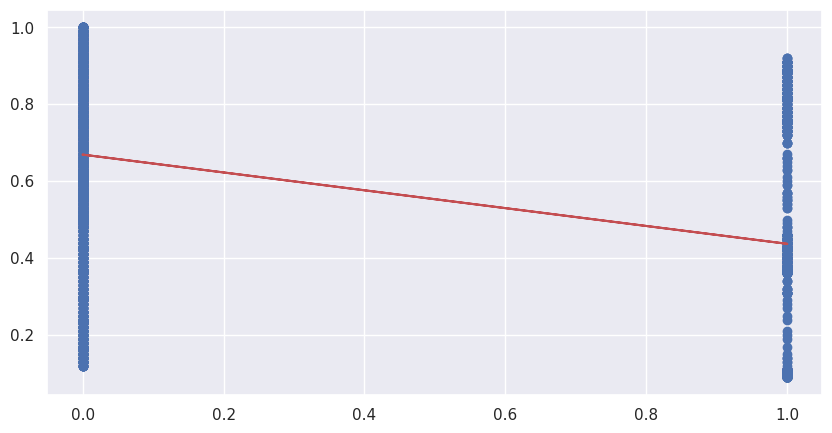

In [52]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [54]:
!git


usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

In [56]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
